In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import pandas as pd
import contextily as ctx


df = pd.read_csv("../data/experiment/all_scenarios.csv")

In [2]:
dbf= gpd.read_file("../data/raw/roads.shp")
frame=pd.read_csv("../data/processed/N1_N2_plus_sideroads.csv")
dbf.head()

osm_id         name   ref         type  oneway  bridge  maxspeed  \
0  8656088      Park Rd  None  residential       0       0       NaN   
1  8656089   Embassy Rd  None  residential       0       0       NaN   
2  8656151  Dutabash Rd  None  residential       0       0       NaN   
3  8656152       Road 1  None  residential       0       0       NaN   
4  8656154       Road 2  None  residential       0       0       NaN   

                                            geometry  
0  LINESTRING (90.42258 23.79758, 90.42238 23.798...  
1  LINESTRING (90.41891 23.79768, 90.42034 23.798...  
2  LINESTRING (90.41857 23.79918, 90.41941 23.799...  
3  LINESTRING (90.41926 23.80001, 90.42059 23.800...  
4  LINESTRING (90.42049 23.80098, 90.42088 23.801...

<AxesSubplot: >

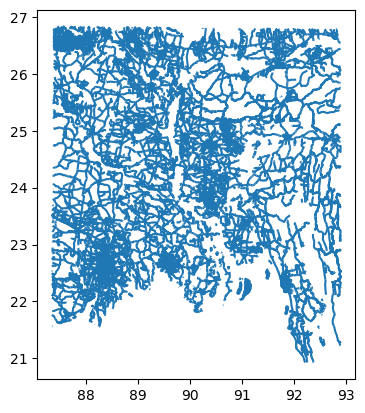

In [3]:
dbf.plot()

In [4]:
frame.head()

road    id  model_type condition   name        lat        lon  length  \
0   N1  1000  sourcesink       NaN  SoSi1  23.706028  90.443333     0.0   
1   N1  1001        link       NaN    NaN  23.702917  90.450417   814.0   
2   N1  1002        link       NaN    NaN  23.702778  90.450472     8.0   
3   N1  1003        link       NaN    NaN  23.702139  90.451972   178.0   
4   N1  1004      bridge         A    NaN  23.698739  90.458861    11.3   

         bridge_name  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4  bridge at id 1004

In [5]:
latmin=frame['lat'].min()
latmax=frame['lat'].max()
lonmin=frame['lon'].min()
lonmax=frame['lon'].max()
print(latmin)
print(latmax)
print(lonmin)
print(lonmax)


20.8470274
25.1808604
90.381916
92.4850274


In [6]:
from shapely.geometry import Polygon

polyshape = gpd.GeoSeries(Polygon([(lonmin,latmin), (lonmin, latmax), (lonmax, latmax), (lonmax, latmin)]))


In [7]:
polydf = gpd.GeoDataFrame({'geometry': polyshape, 'df1':[1]})

<AxesSubplot: >

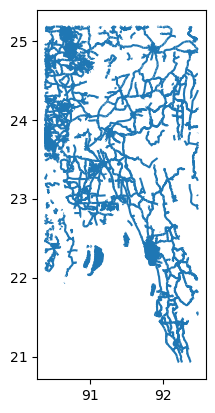

In [8]:
polydf.crs=dbf.crs
clipped_gdf = gpd.clip(dbf, polydf)
clipped_gdf=clipped_gdf['geometry']
clipped_gdf=clipped_gdf.reset_index(drop=True)
clipped_gdf.plot()

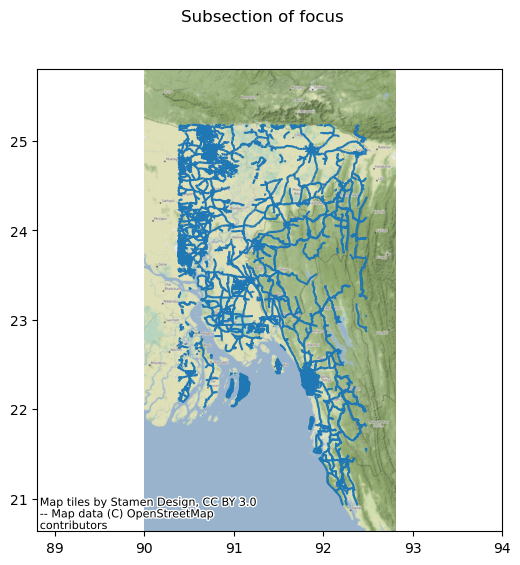

<Figure size 640x480 with 0 Axes>

In [9]:

f, ax = plt.subplots(1, figsize=(6, 6))
clipped_gdf.plot(ax=ax)
ctx.add_basemap(ax=ax, crs=clipped_gdf.crs)
f.suptitle('Subsection of focus')
plt.axis('equal')
plt.show()
plt.savefig('Subsection.png')

In [10]:
df_model = pd.read_csv('../data/processed/N1_N2_plus_sideroads.csv')
df_geom= pd.read_csv('../data/processed/points_shapefile_new.csv') 

In [11]:
df_intersect_model = df_model[df_model["model_type"] == "intersection"]

In [12]:
gdf_intersections = gpd.GeoDataFrame(
    df_intersect_model, geometry=gpd.points_from_xy(df_intersect_model.lon, df_intersect_model.lat))

In [13]:
gdf_intersections.head()

road    id    model_type condition name        lat        lon  length  \
19    N1  6015  intersection       NaN  NaN  23.930027  90.452583   260.0   
133   N1  1133  intersection       NaN  NaN  23.530805  90.781110   815.0   
157   N1  1157  intersection       NaN  NaN  23.513111  90.870638    42.0   
158   N1  1158  intersection       NaN  NaN  23.512667  90.871416   102.0   
209   N1  1209  intersection       NaN  NaN  23.478972  91.117999    28.0   

    bridge_name                   geometry  
19          NaN  POINT (90.45258 23.93003)  
133         NaN  POINT (90.78111 23.53080)  
157         NaN  POINT (90.87064 23.51311)  
158         NaN  POINT (90.87142 23.51267)  
209         NaN  POINT (91.11800 23.47897)

<AxesSubplot: >

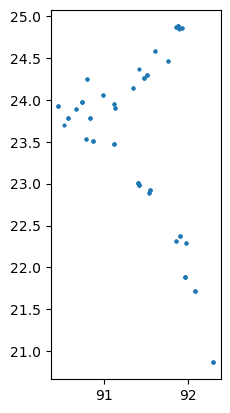

In [14]:
gdf_intersections.plot(markersize=4)

In [15]:
df_geom = df_geom.rename(columns = {'0':'lon', '1':'lat'})

In [16]:
df_geom.head()

Unnamed: 0        lon        lat
0           0  92.194909  21.002732
1           1  92.266108  21.057847
2           2  92.266603  21.060217
3           3  92.142487  21.077862
4           4  92.197069  21.115806

In [17]:

def count_datatypes(df, col_name):
    dtypes_count = {}
    for index, value in df[col_name].iteritems():
        dtype = type(value)
        if dtype not in dtypes_count:
            dtypes_count[dtype] = 1
        else:
            dtypes_count[dtype] += 1
    return dtypes_count

print(count_datatypes(df_geom,'Unnamed: 0'))
print(count_datatypes(df_geom,'lon'))
print(count_datatypes(df_geom,'lat'))
print(df_geom.shape)

{<class 'int'>: 29146}
{<class 'float'>: 29146}
{<class 'float'>: 29146}
(29146, 3)


C:\Users\nachi\AppData\Local\Temp\ipykernel_20040\1149396249.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in df[col_name].iteritems():


In [18]:
gdf_real = gpd.GeoDataFrame(
    df_geom, geometry=gpd.points_from_xy(df_geom.lon, df_geom.lat))

gdf_real.head()

Unnamed: 0        lon        lat                   geometry
0           0  92.194909  21.002732  POINT (92.19491 21.00273)
1           1  92.266108  21.057847  POINT (92.26611 21.05785)
2           2  92.266603  21.060217  POINT (92.26660 21.06022)
3           3  92.142487  21.077862  POINT (92.14249 21.07786)
4           4  92.197069  21.115806  POINT (92.19707 21.11581)

<AxesSubplot: >

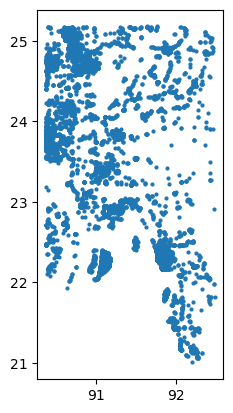

In [19]:
gdf_real.plot(markersize=4)

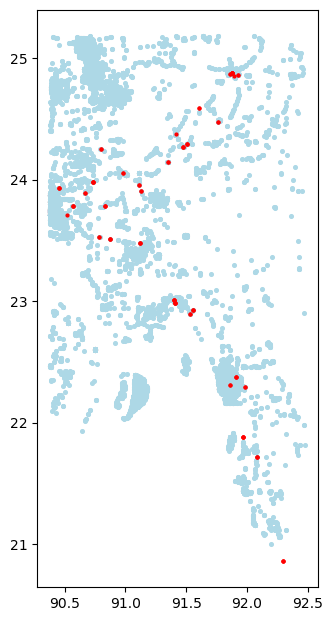

In [20]:
base = gdf_real.plot(color='lightblue', markersize = 7, figsize = (15,7.5))
gdf_intersections.plot(ax=base, marker='o', color='red', markersize=4)
plt.savefig('coincidence.png')

In [21]:
clipped_gdf = gpd.clip(dbf, polydf)
gdf_intersection=gdf_intersections
gdf_intersection.crs=clipped_gdf.crs


In [22]:
temp=gdf_intersection.buffer(0.05)
gdf_overlay=gdf_intersections
gdf_overlay['geometry']=temp

result=gpd.overlay(clipped_gdf, gdf_overlay, how='intersection',keep_geom_type=False)
result

C:\Users\nachi\AppData\Local\Temp\ipykernel_20040\1786916825.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  temp=gdf_intersection.buffer(0.05)


osm_id                          name_1               ref  \
0      85651707  Chittagong Cox's Bazar Highway  Chittagong Cox's   
1     196736895            MCH Roads (Workshop)              None   
2     196736894       MCH Roads (Tribal Office)              None   
3     196736885                       MCH Roads              None   
4     196736891            MCH Roads (House 9B)              None   
...         ...                             ...               ...   
8836  278051659            Dhaka-Sylhet Highway               N 2   
8837  278051645            Dhaka-Sylhet Highway               N 2   
8838  278051657            Dhaka-Sylhet Highway               N 2   
8839  278051659            Dhaka-Sylhet Highway               N 2   
8840  278051645            Dhaka-Sylhet Highway               N 2   

             type  oneway  bridge  maxspeed  road    id    model_type  \
0         primary       0       0       NaN    N1  1950  intersection   
1     residential       0       0      15.0    N1  1950  intersection   
2     residential       0       0      15.0    N1  1950  intersection   
3     residential       0       0      25.0    N1  1950  intersection   
4     residential       0       0      15.0    N1  1950  intersection   
...           ...     ...     ...       ...   ...   ...           ...   
8836        trunk       0       0       NaN    N2  3679  intersection   
8837        trunk       0       1       NaN    N2  3679  intersection   
8838        trunk       0       0       NaN  R240  3679  intersection   
8839        trunk       0       0       NaN  R240  3679  intersection   
8840        trunk       0       1       NaN  R240  3679  intersection   

     condition name_2        lat        lon  length bridge_name  \
0          NaN    NaN  21.721555  92.083083   163.0         NaN   
1          NaN    NaN  21.721555  92.083083   163.0         NaN   
2          NaN    NaN  21.721555  92.083083   163.0         NaN   
3          NaN    NaN  21.721555  92.083083   163.0         NaN   
4          NaN    NaN  21.721555  92.083083   163.0         NaN   
...        ...    ...        ...        ...     ...         ...   
8836       NaN    NaN  24.591055  91.601417   189.0         NaN   
8837       NaN    NaN  24.591055  91.601417   189.0         NaN   
8838         A    NaN  24.591055  91.601417     1.5         NaN   
8839         A    NaN  24.591055  91.601417     1.5         NaN   
8840         A    NaN  24.591055  91.601417     1.5         NaN   

                                               geometry  
0     LINESTRING (92.07649 21.67205, 92.07651 21.672...  
1     LINESTRING (92.07725 21.68229, 92.07683 21.681...  
2     LINESTRING (92.07665 21.68209, 92.07645 21.682...  
3     LINESTRING (92.07807 21.68142, 92.07794 21.681...  
4     LINESTRING (92.07450 21.68361, 92.07454 21.683...  
...                                                 ...  
8836  LINESTRING (91.60538 24.55257, 91.60497 24.554...  
8837  LINESTRING (91.60564 24.55122, 91.60538 24.55257)  
8838  LINESTRING (91.60450 24.54121, 91.60546 24.546...  
8839  LINESTRING (91.60538 24.55257, 91.60497 24.554...  
8840  LINESTRING (91.60564 24.55122, 91.60538 24.55257)  

[8841 rows x 17 columns]

In [23]:
print(df_intersect_model.shape)
print(len(result.id.unique()))

(87, 10)
44


In [24]:
def count_values(df, column_name):
    """Counts the instances of a particular value in a given column of a Pandas DataFrame and stores it as a dictionary.
    
    Args:
        df (pandas.DataFrame): The DataFrame to count the values in.
        column_name (str): The name of the column to count the values in.
        value (any): The value to count the instances of.
    
    Returns:
        dict: A dictionary where the keys are the unique values in the specified column and the values are the number of instances of the specified value in that column.
    """
    count_dict = {}
    for unique_value in df[column_name].unique():
        count = (df[column_name] == unique_value)
        count_dict[unique_value] = count.sum()
    return count_dict

In [25]:
roadids=pd.DataFrame(result.id.unique())
roadids['count']=0
counts = result.groupby('id').size().reset_index(name='count')

for row in counts.itertuples():
    roadids.loc[roadids[0] == row.id, 'count'] = row.count
     

In [26]:
roadids.head()

0  count
0  1950     69
1  4900      3
2  4901      3
3  4902      3
4  4903      3

In [27]:
road_sorted = roadids.sort_values(by = "count", ascending=False)
road_sorted.head()

0  count
5   1663   4654
7   7716   1011
24  5776    656
23  3824    328
21  3811    318

Text(0.5, 1.0, 'Intersections and accuracy')

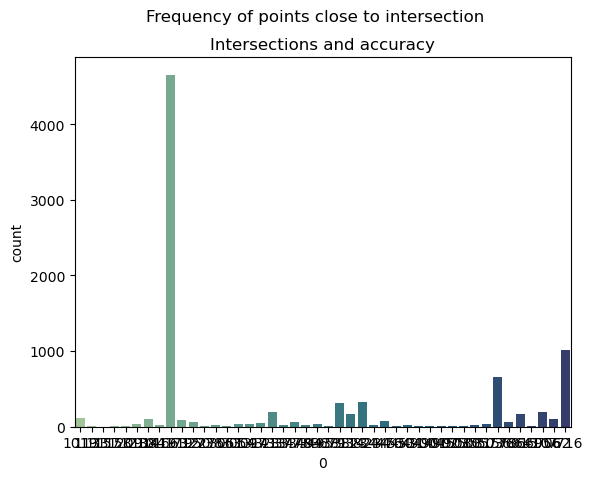

In [28]:
sns.barplot(x=0,y='count', data=road_sorted, palette='crest');
plt.suptitle('Frequency of points close to intersection')
plt.title('Intersections and accuracy')
#plt.savefig('delay_time.png')

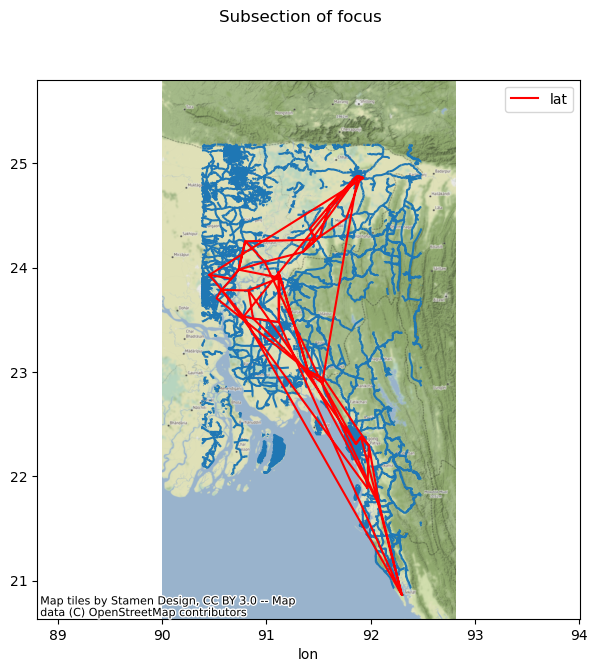

In [29]:
intersections=gdf_intersections.drop(columns=['geometry'])
f, ax = plt.subplots(1, figsize=(7, 7))
clipped_gdf.plot(ax=ax)
intersections.plot(ax=ax, color='red',x='lon',y='lat')
ctx.add_basemap(ax=ax, crs=clipped_gdf.crs)
f.suptitle('Subsection of focus')
plt.axis('equal')
plt.show()